# SyriaTel Telecom Customer Churn

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> You own a supermarket mall and through membership cards you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

> **Problem Statement:** You want to understand the customers like who can be easily converge [Target Customers] so that the marketing team can plan a strategy accordingly.

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [5]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")


# Loading the Data from the source i.e. csv
dataset_url = "bigml_59c28831336c6604c800002a.csv"
df = pd.read_csv(dataset_url)

df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False




## 3. Checking the Data

In [6]:
# Determining the no. of records in our dataset
df.shape

(3333, 21)

In [7]:
print("Number of rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of rows 3333
Number of Columns 21


In [8]:
# Previewing the top of our dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


The dataset contains 3333 rows and 21 columns. Our target variable is churn.

In [9]:
# Previewing the bottom of our dataset
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [10]:
# Checking whether each column has an appropriate datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [11]:
#check 

In [12]:
print('Raw counts: \n')
print(df['churn'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(df['churn'].value_counts(normalize=True))

Raw counts: 

False    2850
True      483
Name: churn, dtype: int64
-----------------------------------
Normalized counts: 

False    0.855086
True     0.144914
Name: churn, dtype: float64


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [13]:
# Checking for Outliers
#

In [14]:
# Checking for Anomalies
#

In [15]:
# Identifying the Missing Data
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

We have no missing data

In [16]:
# Checking overall statistics about the dataset
df.describe(include = 'all')

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333,3333.000000,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,327-8495,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,1,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,...,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,...,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,...,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,...,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


## Drop Irrelevant Columns

In [17]:
#Dropping irrelevant features
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [18]:
df = df.drop(['state', 'account length', 'area code', 'phone number'],axis = 1)

In [19]:
df.head()

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Encoding categorical data

#### Convert Categorical Features into Numbers

In [20]:
#Encoding categorical data
df['international plan'].unique()

array(['no', 'yes'], dtype=object)

In [21]:

# (0) import OrdinalEncoder from sklearn.preprocessing
from sklearn.preprocessing import OrdinalEncoder

# (1) Create a variable street_train that contains the
# relevant column from X_train
# (Use double brackets [[]] to get the appropriate shape)
#street_train = X_train[['Street']]

# (2) Instantiate an OrdinalEncoder
encoder_international_plan = OrdinalEncoder()

# (3) Fit the encoder on street_train
encoder_international_plan.fit(df[['international plan']])

# Inspect the categories of the fitted encoder
#encoder_international_plan.categories_[0]

# (4) Transform street_train using the encoder and
# assign the result to street_encoded_train
encoded_international_plan = encoder_international_plan.transform(df[['international plan']])

# Flatten for appropriate shape
encoded_international_plan = encoded_international_plan.flatten()

# Visually inspect street_encoded_train
encoded_international_plan # 0 for no, 1 for yes

array([0., 0., 0., ..., 0., 1., 0.])

In [22]:
#Encoding categorical data
df['voice mail plan'].unique()

array(['yes', 'no'], dtype=object)

In [23]:
# (0) import OrdinalEncoder from sklearn.preprocessing
from sklearn.preprocessing import OrdinalEncoder

# (1) Create a variable street_train that contains the
# relevant column from X_train
# (Use double brackets [[]] to get the appropriate shape)
#street_train = X_train[['Street']]

# (2) Instantiate an OrdinalEncoder
encoder_voicemail = OrdinalEncoder()

# (3) Fit the encoder on street_train
encoder_voicemail.fit(df[['voice mail plan']])

# Inspect the categories of the fitted encoder
#encoder_voicemail.categories_[0]

# (4) Transform street_train using the encoder and
# assign the result to street_encoded_train
encoded_voicemail = encoder_voicemail.transform(df[['voice mail plan']])

# Flatten for appropriate shape
encoded_voicemail = encoded_voicemail.flatten()

# Visually inspect street_encoded_train 
encoded_voicemail #0 for no,1 for yes

array([1., 1., 0., ..., 0., 0., 1.])

In [24]:
# Replace value of Voice mail plan
df['voice mail plan'] = encoded_voicemail

#Replace value of International plan
df['international plan'] = encoded_international_plan
df.head()

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [25]:
##changing bool to int 
df["churn"] = df["churn"].astype(int)
df.head()


,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   international plan      3333 non-null   float64
 1   voice mail plan         3333 non-null   float64
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total day charge        3333 non-null   float64
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  total intl charge       3333 non-null   

All columns are numerical we can then proceed.

## Checking for Class Imbalance

In [27]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

<AxesSubplot:xlabel='churn', ylabel='count'>

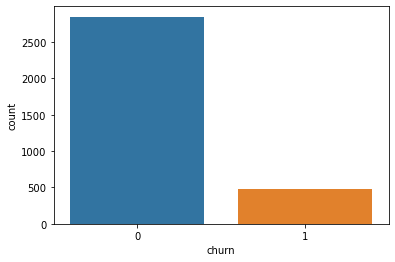

In [28]:
sns.countplot(df['churn'])

From the countplot, we can see that the data is imbalanced.

In [29]:
y = df['churn']
X = df.drop(columns = 'churn') 

## Handling imbalanced data with SMOTE


In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
X_resample, y_resample = SMOTE().fit_resample(X, y)

In [32]:
y_resample.value_counts()

1    2850
0    2850
Name: churn, dtype: int64

## Splitting data into Training set and Testing set

In [33]:
#split data using the train_test_split module imported above

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.20, random_state = 42)

## Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
#Instantiate a scaler
scaler = StandardScaler()

#transform the X_train
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [36]:
#Instantiate a logReg model
log = LogisticRegression()

In [37]:
log.fit(X_train, y_train)

LogisticRegression()

In [55]:
y_predict1 = log.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict1)

0.7631578947368421

Next we check for precision, recall and f1 score.

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [58]:
precision_score(y_test, y_predict1)

0.7513227513227513

In [59]:
recall_score(y_test, y_predict1)

0.7675675675675676

In [60]:
f1_score(y_test, y_predict1)

0.7593582887700535

## SVC

In [61]:
from sklearn import svm

In [62]:
svm = svm.SVC()

In [63]:
svm.fit(X_train, y_train)
y_predict2 = svm.predict(X_test)


In [77]:
# calculate paccuracy score
accuracy_score(y_test, y_predict2)

0.9114035087719298

In [78]:
precision_score(y_test, y_predict2)

0.9299242424242424

In [79]:
recall_score(y_test, y_predict2)

0.8846846846846846

In [80]:
f1_score(y_test, y_predict2)

0.9067405355493998

# KNeighbours Classifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
#instantiate a knn class
knn = KNeighborsClassifier()

In [83]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [84]:
y_predict3 = knn.predict(X_test)

In [85]:
accuracy_score(y_test, y_predict3)

0.9105263157894737

In [86]:
precision_score(y_test, y_predict3)

0.8578199052132701

In [87]:
recall_score(y_test, y_predict3)

0.9783783783783784

In [88]:
f1_score(y_test, y_predict3)

0.9141414141414143

# Decision Tree Classifier

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
dt = DecisionTreeClassifier()

In [91]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [92]:
y_predict4 = dt.predict(X_test)

In [93]:
accuracy_score(y_test, y_predict4)

0.9157894736842105

In [94]:
precision_score(y_test, y_predict4)

0.900523560209424

In [95]:
recall_score(y_test, y_predict4)

0.9297297297297298

In [96]:
f1_score(y_test, y_predict4)

0.9148936170212766

# Random Forests

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf = RandomForestClassifier()

In [99]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [100]:
y_predict5 = rf.predict(X_test)

In [101]:
accuracy_score(y_test, y_predict5)

0.9605263157894737

In [102]:
precision_score(y_test, y_predict5)

0.9704797047970479

# Gradient Boosting Classifier

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

In [106]:
gbc = GradientBoostingClassifier()

In [107]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [108]:
y_predict6 = gbc.predict(X_test)

In [109]:
accuracy_score(y_test, y_predict6)

0.9280701754385965

In [110]:
precision_score(y_test, y_predict6)

0.9504761904761905

## 6. Exploratory Analysis

### Final Dataframe

In [118]:
final_df = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'], 
                        'ACC': [accuracy_score(y_test, y_predict1),
                               accuracy_score(y_test, y_predict2),
                               accuracy_score(y_test, y_predict3),
                               accuracy_score(y_test, y_predict4),
                               accuracy_score(y_test, y_predict5),
                               accuracy_score(y_test, y_predict6),]})
#Check the dataframe
final_df

,Models,ACC
0,LR,0.763158
1,SVC,0.911404
2,KNN,0.910526
3,DT,0.915789
4,RF,0.960526
5,GBC,0.928070


 Random Forests has the highest accuracy score

<AxesSubplot:xlabel='Models', ylabel='ACC'>

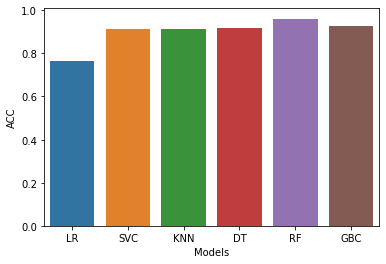

In [119]:
sns.barplot(final_df['Models'], final_df['ACC'])

In [115]:
final_df = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'], 
                        'PRE': [precision_score(y_test, y_predict1),
                               precision_score(y_test, y_predict2),
                               precision_score(y_test, y_predict3),
                               precision_score(y_test, y_predict4),
                               precision_score(y_test, y_predict5),
                               precision_score(y_test, y_predict6),]})
#Check the dataframe
final_df

,Models,PRE
0,LR,0.751323
1,SVC,0.929924
2,KNN,0.857820
3,DT,0.900524
4,RF,0.970480
5,GBC,0.950476


##### Random Forests has the highest precision as well

<AxesSubplot:xlabel='Models', ylabel='PRE'>

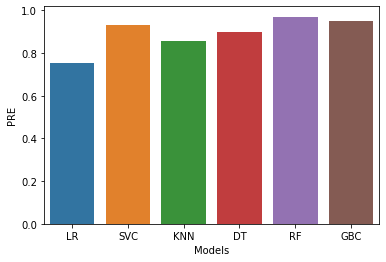

In [116]:
sns.barplot(final_df['Models'], final_df['PRE'])

## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
# 

In [120]:
X_resample = scaler.fit_transform(X_resample)

In [121]:
rf.fit(X_resample, y_resample)

RandomForestClassifier()

In [122]:
#pickling
import joblib

In [123]:
joblib.dump(rf, 'Churn_Prediction_model')

['Churn_Prediction_model']

In [124]:
model = joblib.load('Churn_Prediction_model')

In [125]:
df.columns

Index(['international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [131]:
churn = model.predict([[12,23,43,45,5,6,34,5,76,89,0,0,23,12,12,3]])
 #0 for the customer will not leave, 1 for te customer will leave

if churn:
    print("The customer will churn/leave")
else:
    print("This customer will stay") 

This customer will stay


## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?